In [2]:
!pip install ucimlrepo

In [3]:
#import of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [5]:
#target variable
y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [6]:
#features variables
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


#Data Processing

In [7]:
# Concatenate the two data frames along the columns axis
df = pd.concat([X, y], axis=1)

In [8]:
#print dataframe
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [9]:
#dataframe shape
df.shape

(8124, 23)

In [10]:
#sum of null values
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [11]:
# Drop the column with large null values
df.drop(columns=['stalk-root'], inplace=True)

In [13]:
#rechecking the null values
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
poisonous                   0
dtype: int64

In [14]:
# Rename column 'Poisonous' to 'Class'
df.rename(columns={'poisonous': 'class'}, inplace=True)

#Bivirate Analysis

In [15]:
#checking target variable
df['class'].unique()

array(['p', 'e'], dtype=object)

In [16]:
# Count of class category
class_counts = df['class'].value_counts().sort_values()
class_counts

class
p    3916
e    4208
Name: count, dtype: int64

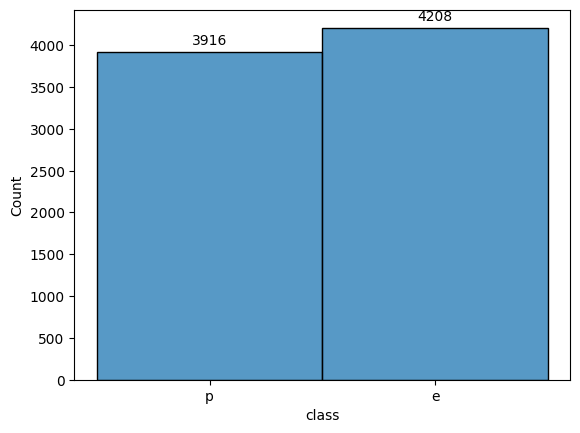

In [17]:
# Plot histogram
ax = sns.histplot(df['class'])

# Display the values on the plot
for i, v in enumerate(class_counts):
    ax.text(i, v + 50, str(v), ha='center', va='bottom')

plt.show()

#Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of your DataFrame to preserve the original data
df = df.copy()

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column in your DataFrame
for column in df.columns:
    # Check if the column data type is object (categorical)
    if df[column].dtype == 'object':
        # Use LabelEncoder to encode the categorical values into numerical values
        df[column] = label_encoder.fit_transform(df[column])

# Now, encoded_df contains numerical values for categorical columns
df.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


#Correlation

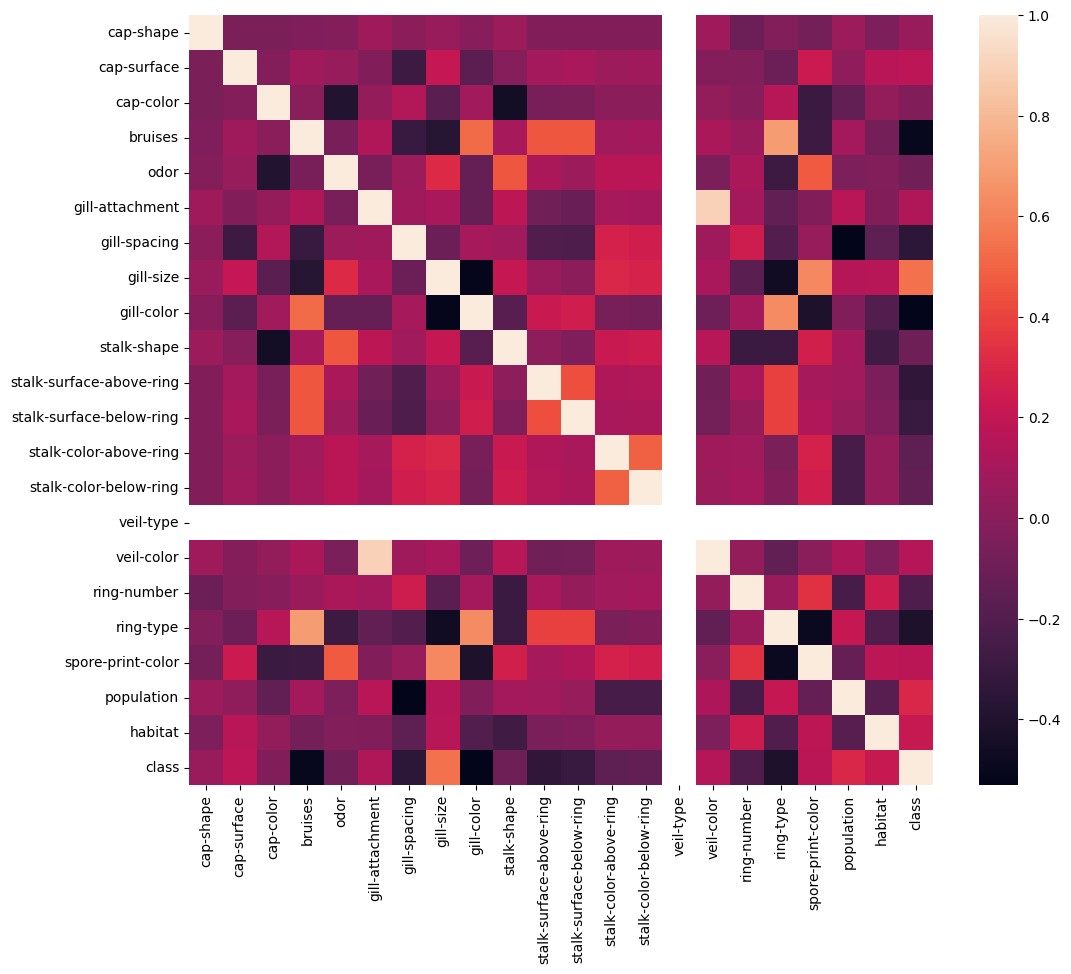

In [19]:
#heat map for correlation
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr())

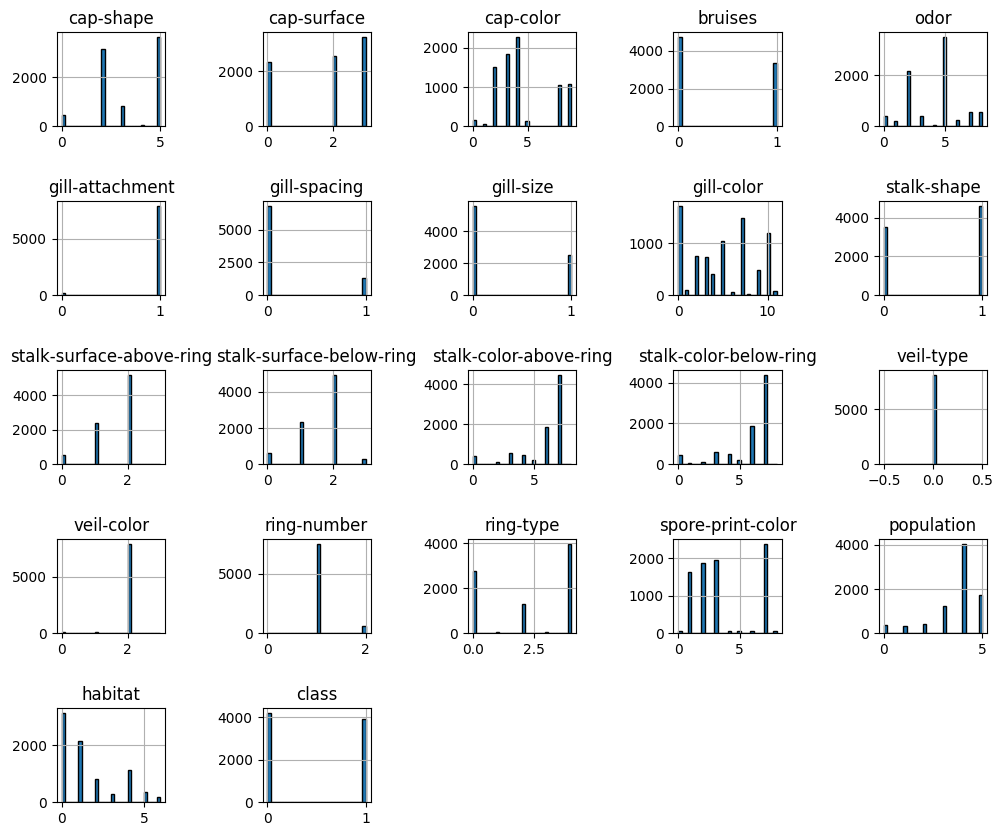

In [20]:
#histogram for dataframe
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.8, wspace=0.9)

#Model Preparations

In [21]:
#assigning target and features
X = df.drop(['class'],axis=1)
y = df['class']

In [24]:
#target varaible
print(y)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64


In [25]:
#Features
print(X)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          1       

#Spliting and Scalling Data

In [26]:
# Create a train and test dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split the dataset with test size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45, stratify = y)
#Scale the dependent variable
scale= StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [27]:
#data shape
print(X_train.shape)
print(X_test.shape)

(5686, 21)
(2438, 21)


In [28]:
#data shape
print(y_train.shape)
print(y_test.shape)

(5686,)
(2438,)


#Building Logistic Regression Model

In [29]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
parameter = {'C': [0.001, 0.01, 0.1, 1.0, 10.0]}
#Kfold for evaluating the performance of my model
#gridsearch technique used for hyperparameter tuning
kf = KFold(n_splits=5, shuffle=True, random_state=30)
grid_cv = GridSearchCV(lr, parameter, cv=kf)
grid_cv.fit(X_train, y_train.values.ravel())  # Convert y_train DataFrame to a 1D array using values.ravel()

print('The Best Parameter: {}'.format(grid_cv.best_params_))
print('The Best Score: {}'.format(grid_cv.best_score_))

The Best Parameter: {'C': 1.0}
The Best Score: 0.9511083494473322


In [30]:
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(C=0.1)

# Convert y_train to a 1D array
y_train_1d = y_train.values.ravel()

# Fit the model
lr_model.fit(X_train, y_train_1d)

# Make predictions
lr_preds = lr_model.predict(X_test)
y_pred_lr_prob = lr_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, lr_preds)
print('Logistic Regression Accuracy: {:.3f}'.format(accuracy_lr))
print('Training set score: {:.3f}'.format(lr_model.score(X_train, y_train)))

Logistic Regression Accuracy: 0.937
Training set score: 0.951


In [31]:
#prediction
lr_preds

array([1, 1, 1, ..., 1, 1, 1])

#Building Random Forest Classifier Model

In [59]:
# Try to get the best hyperparameter for random forest classifier
# import the random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier ()
parameter ={'max_depth':[3,4,5],'min_samples_leaf':[0.1,0.2,0.3],'n_estimators':[300, 400, 450]}
grid_rf = GridSearchCV(rf, param_grid =parameter, cv=3, n_jobs=-1)
grid_rf.fit(X_train,y_train_1d)
print('Best score: {}'.format (grid_rf.best_score_))
print ('Best params: {}'.format (grid_rf.best_params_))
print ('Best model: {}'. format(grid_rf.best_estimator_))
rf_model = grid_rf.best_estimator_

Best score: 0.9236705335307587
Best params: {'max_depth': 4, 'min_samples_leaf': 0.1, 'n_estimators': 400}
Best model: RandomForestClassifier(max_depth=4, min_samples_leaf=0.1, n_estimators=400)


In [60]:
# fit the model
rf_model.fit(X_train, y_train_1d)

# create the prediction
rf_preds = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:,1]
accuracy_rf = rf_model.score(X_test, y_test)

# print accuracy score
print('Random Forest Classifier Accuracy : \n{:.3f}'.format(accuracy_rf))
print('Training set score: {:.3f}'.format(rf_model.score(X_train, y_train)))

Random Forest Classifier Accuracy : 
0.903
Training set score: 0.916


In [34]:
#prediction
rf_preds

array([1, 1, 1, ..., 1, 0, 1])

#Building DecisionTreeClassifier Models

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
dtc_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
dtc_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5, 0.875, 'x[8] <= -0.367\ngini = 0.499\nsamples = 5686\nvalue = [2945, 2741]'),
 Text(0.25, 0.625, 'x[19] <= -0.115\ngini = 0.27\nsamples = 2311\nvalue = [371, 1940]'),
 Text(0.125, 0.375, 'x[18] <= -0.882\ngini = 0.213\nsamples = 405\nvalue = [356, 49]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.1875, 0.125, 'gini = 0.082\nsamples = 372\nvalue = [356, 16]'),
 Text(0.375, 0.375, 'x[20] <= 1.761\ngini = 0.016\nsamples = 1906\nvalue = [15, 1891]'),
 Text(0.3125, 0.125, 'gini = 0.005\nsamples = 1880\nvalue = [5, 1875]'),
 Text(0.4375, 0.125, 'gini = 0.473\nsamples = 26\nvalue = [10, 16]'),
 Text(0.75, 0.625, 'x[18] <= -0.882\ngini = 0.362\nsamples = 3375\nvalue = [2574, 801]'),
 Text(0.625, 0.375, 'x[4] <= -0.319\ngini = 0.21\nsamples = 502\nvalue = [60, 442]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 442\nvalue = [0, 442]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.875, 0.375, 'x[7] <= 0.424\ngini = 0.219\ns

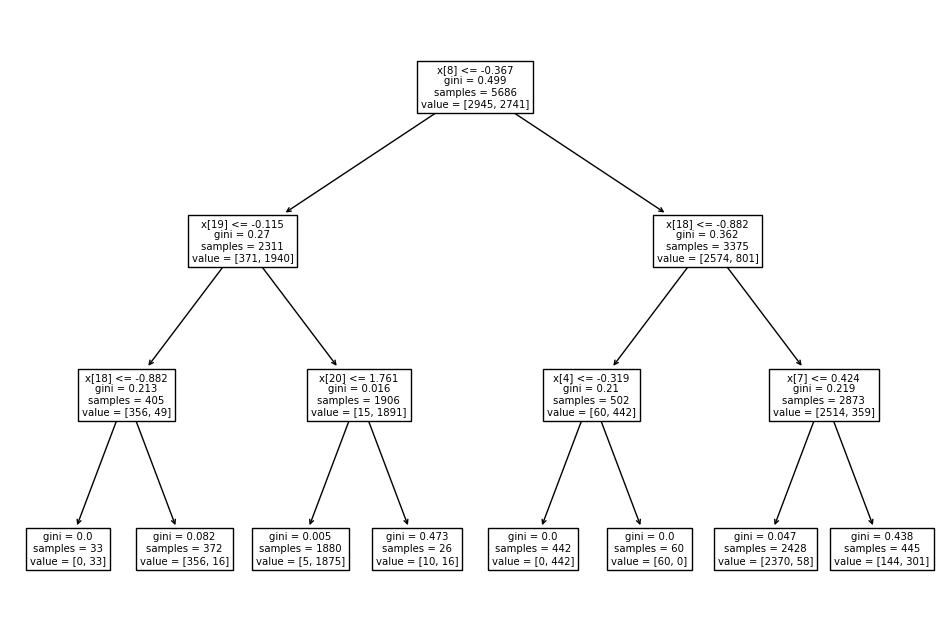

In [36]:
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(dtc_gini.fit(X_train, y_train))

In [37]:
#Predict the values
y_pred_gini = dtc_gini.predict(X_test)

In [38]:
#Predict the value using X train for accuracy comparision
y_pred_train_gini = dtc_gini.predict(X_train)

y_pred_train_gini

array([0, 1, 0, ..., 1, 1, 0])

In [39]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9479
Training-set accuracy score: 0.9590


In [40]:
#Decision Tree Classifier with splitting criterion as Entropy impurity, the maximum depth of the tree is 3.
dtc_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
dtc_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5, 0.875, 'x[8] <= -0.367\nentropy = 0.999\nsamples = 5686\nvalue = [2945, 2741]'),
 Text(0.25, 0.625, 'x[19] <= -0.115\nentropy = 0.636\nsamples = 2311\nvalue = [371, 1940]'),
 Text(0.125, 0.375, 'x[4] <= -0.797\nentropy = 0.532\nsamples = 405\nvalue = [356, 49]'),
 Text(0.0625, 0.125, 'entropy = 0.986\nsamples = 86\nvalue = [37, 49]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 319\nvalue = [319, 0]'),
 Text(0.375, 0.375, 'x[20] <= 1.761\nentropy = 0.066\nsamples = 1906\nvalue = [15, 1891]'),
 Text(0.3125, 0.125, 'entropy = 0.027\nsamples = 1880\nvalue = [5, 1875]'),
 Text(0.4375, 0.125, 'entropy = 0.961\nsamples = 26\nvalue = [10, 16]'),
 Text(0.75, 0.625, 'x[18] <= -0.882\nentropy = 0.791\nsamples = 3375\nvalue = [2574, 801]'),
 Text(0.625, 0.375, 'x[4] <= -0.319\nentropy = 0.528\nsamples = 502\nvalue = [60, 442]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 442\nvalue = [0, 442]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.875, 0

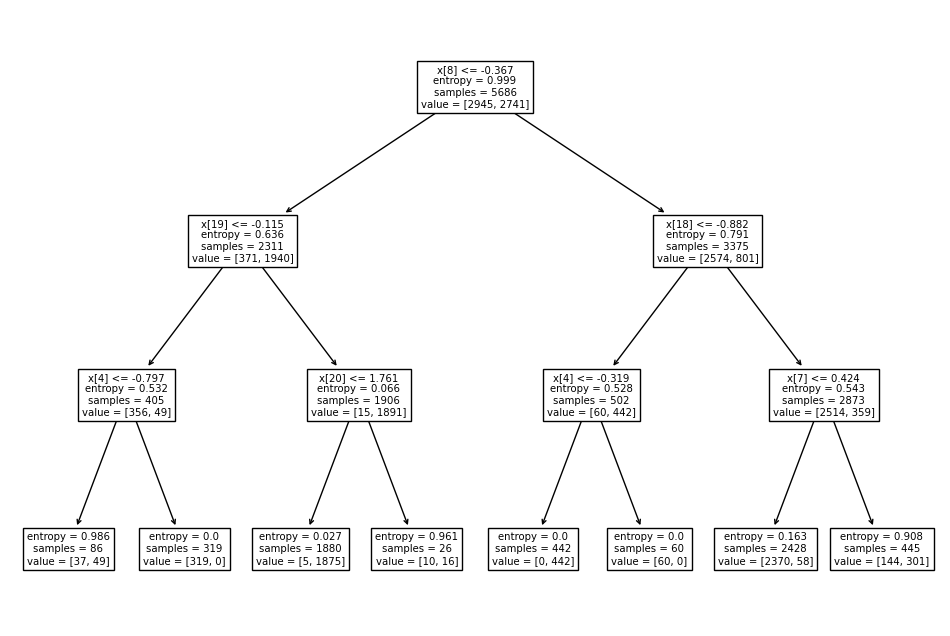

In [41]:
plt.figure(figsize=(12,8))
tree.plot_tree(dtc_en.fit(X_train, y_train))

In [42]:
#Predict the values
y_pred_en = dtc_en.predict(X_test)

In [43]:
#Predict the value using X train for accuracy comparision
y_pred_train_en = dtc_en.predict(X_train)

In [44]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9401
Training-set accuracy score: 0.9553


#Confusiom Matrix For the Best Model

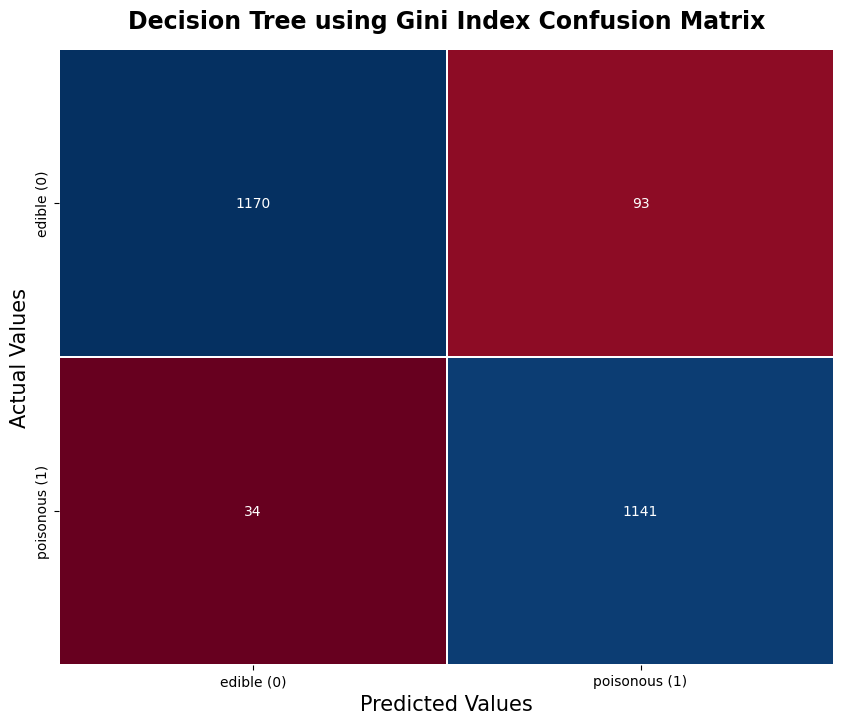

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score
from sklearn.metrics import roc_auc_score
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_gini),
            cbar=False,
            cmap='RdBu',
            annot=True,
            fmt='.0f',
            linewidth=0.1)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.title('Decision Tree using Gini Index Confusion Matrix', fontsize=17, y=1.02, weight='bold')

# Set the labels for the x-axis and y-axis
class_labels = ['edible (0)', 'poisonous (1)']
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

plt.show()

In [46]:
#classification report for logisitic regresion
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1263
           1       0.95      0.92      0.93      1175

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



In [62]:
#classification report for RandomForestClassifier
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1263
           1       0.96      0.84      0.89      1175

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438



In [48]:
#classification report for Decision Tree using gini  Index
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1263
           1       0.92      0.97      0.95      1175

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [49]:
#classification report for Decision Tree using entropy Index
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1263
           1       0.91      0.98      0.94      1175

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



In [50]:
print('AUC Score for logisitic regresion : \n{:.3f}'.format(roc_auc_score(y_test, lr_preds)))

AUC Score for logisitic regresion : 
0.937


In [51]:
print('AUC Score for RandomForestClassifier: \n{:.3f}'.format(roc_auc_score(y_test, rf_preds)))

AUC Score for RandomForestClassifier: 
0.885


In [52]:
print('AUC Score for Decision Tree using gini impurity: \n{:.3f}'.format(roc_auc_score(y_test, y_pred_gini)))

AUC Score for Decision Tree using gini impurity: 
0.949


In [53]:
print('AUC Score for Decision Tree using entropy impurity: \n{:.3f}'.format(roc_auc_score(y_test, y_pred_en)))

AUC Score for Decision Tree using entropy impurity: 
0.941


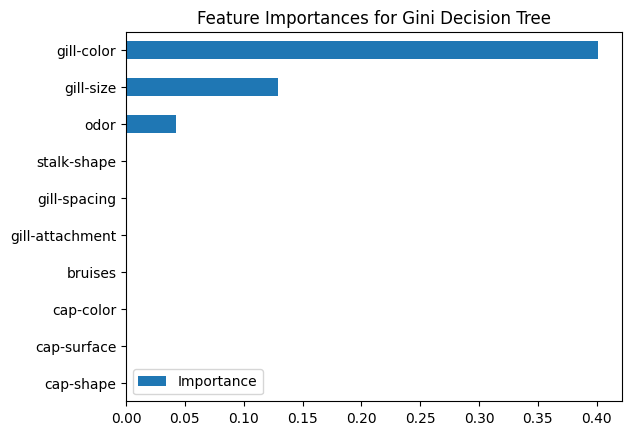

In [54]:
# get feature importance
dtc_gini_model_importances = pd.DataFrame(data =  dtc_gini.feature_importances_, index = X.columns, columns = ['Importance'])

# plot top 10 feature importance, sorted
dtc_gini_model_importances[:10].sort_values(by = 'Importance').plot.barh()

plt.title('Feature Importances for Gini Decision Tree')
plt.show()

In [55]:
from sklearn.metrics import roc_curve
# Map class labels to binary values (e.g., 0 and 1)
y_test_binary = y_test

# Compute ROC curve
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test_binary, lr_preds)

# Compute AUC score
auc_score_lr = roc_auc_score(y_test_binary, lr_preds)

# Print the AUC score
print(f'The Area Under ROC Curve Score for logisitic regresion  {auc_score_lr*100:.2f}%')


The Area Under ROC Curve Score for logisitic regresion  93.67%


In [56]:
from sklearn.metrics import roc_curve
# Map class labels to binary values (e.g., 0 and 1)
y_test_binary = y_test

# Compute ROC curve
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test_binary, rf_preds)

# Compute AUC score
auc_score_rf = roc_auc_score(y_test_binary, rf_preds)

# Print the AUC score
print(f'The Area Under ROC Curve Score for RandomForestClassifier {auc_score_rf*100:.2f}%')


The Area Under ROC Curve Score for RandomForestClassifier 88.48%


In [57]:
from sklearn.metrics import roc_curve
# Map class labels to binary values (e.g., 0 and 1)
y_test_binary = y_test

# Compute ROC curve
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test_binary, y_pred_gini)

# Compute AUC score
auc_score_gini = roc_auc_score(y_test_binary, y_pred_gini)

# Print the AUC score
print(f'The Area Under ROC Curve Score  for Decision Tree using gini impurity  is {auc_score_gini*100:.2f}%')

The Area Under ROC Curve Score  for Decision Tree using gini impurity  is 94.87%


In [58]:
from sklearn.metrics import roc_curve
# Map class labels to binary values (e.g., 0 and 1)
y_test_binary = y_test

# Compute ROC curve
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test_binary, y_pred_en)

# Compute AUC score
auc_score_en = roc_auc_score(y_test_binary, y_pred_en)

# Print the AUC score
print(f'The Area Under ROC Curve Score for Decision Tree using entropy impurity is {auc_score_en*100:.2f}%')


The Area Under ROC Curve Score for Decision Tree using entropy impurity is 94.14%
